In [20]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Add SystemML PySpark API file.
#sc.addPyFile("https://raw.githubusercontent.com/apache/incubator-systemml/branch-0.10/src/main/java/org/apache/sysml/api/python/SystemML.py")

from glob import glob

import matplotlib.pyplot as plt  
import matplotlib as mpl  
import numpy as np  
import openslide  
from openslide import open_slide  
from openslide.deepzoom import DeepZoomGenerator  
import pandas as pd

from scipy.ndimage.morphology import binary_fill_holes, binary_closing, binary_dilation  
from skimage.color import rgb2gray  
from skimage.morphology import closing, binary_closing, disk, remove_small_holes, dilation, remove_small_objects  
from skimage import color, morphology, filters, exposure, feature

plt.rcParams['figure.figsize'] = (10, 6)  

#Start by getting your images from your data/ file.
files = glob("Data/Stage1/*.svs")  
files
#Specify which image/slide it is. For this example I will
#use slide 7.
slide_num = 3
slide = open_slide(files[slide_num-1]) 

tile_size = 256
tiles = DeepZoomGenerator(slide, tile_size=tile_size, overlap=0, limit_bounds=False)  
# overlap adds pixels to each side
# See how many tiles there are for each level of magnification.
tiles.level_tiles  



((1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (5, 2),
 (9, 4),
 (18, 7),
 (35, 14),
 (69, 27),
 (138, 53),
 (276, 106),
 (552, 212))

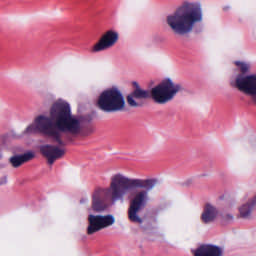

In [19]:
#choose tiles you want to look at. You can change around 
#the coordinates to get the tile you are looking for.
#This is where OpenSlide helps.

tile = tiles.get_tile(tiles.level_count-1, (300,100))
tile

In [25]:
tiles.level_dimensions

((1, 1),
 (2, 1),
 (3, 1),
 (5, 2),
 (9, 4),
 (18, 7),
 (35, 14),
 (69, 27),
 (138, 53),
 (276, 106),
 (552, 212),
 (1103, 423),
 (2206, 846),
 (4411, 1692),
 (8822, 3384),
 (17643, 6767),
 (35285, 13534),
 (70569, 27068),
 (141137, 54135))

In [29]:
tiles.tile_count

156133

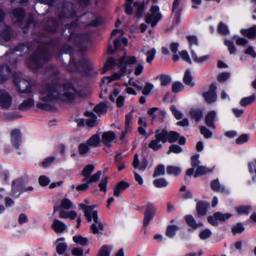

In [78]:
tile = tiles.get_tile(tiles.level_count-2, (150,40))
tile

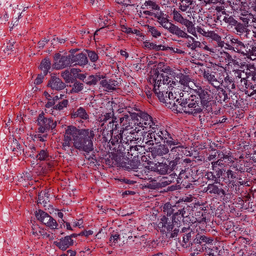

In [91]:
tile = tiles.get_tile(tiles.level_count-6, (1,4))
tile

In [82]:
tiles._get_tile_info

<bound method DeepZoomGenerator._get_tile_info of DeepZoomGenerator(OpenSlide('Data/Stage1/TCGA-BH-A0BQ-01A-01-BSA.bad7666c-e404-4d97-af8d-2335bf33f31c.svs'), tile_size=256, overlap=0, limit_bounds=False)>

In [83]:
tiles.get_tile_coordinates(tiles.level_count-6, (1,4))

((8192, 32768), 2, (512, 512))